In [4]:
import matplotlib.pyplot as plt
import json

In [17]:
def get_most_common_words(json_file, n):
    # NOTE: Restricts to alphabetic characters only
    with open(json_file, "r") as f:
        data = json.load(f)
    sentences = [info[1] for info in data["texts"]]
    words = {}
    for sentence in sentences:
        for word in sentence.split():
            word = word.lower()
            word = "".join([c for c in word if c.isalpha()])
            if len(word) == 0:
                continue
            if word not in words:
                words[word] = 0
            words[word] += 1
    words = sorted(words.items(), key=lambda x: x[1], reverse=True)
    return words[:n]

def plot_most_common_words(json_file, n, title="Most Common Words"):
    words = get_most_common_words(json_file, n)
    plt.bar([word[0] for word in words], [word[1] for word in words])
    plt.xticks(rotation=90)
    plt.xlabel("Word")
    plt.ylabel("Occurences")
    plt.title(title)
    plt.show()

In [25]:
def plot_rate_of_text(json_file, title="Rate of Texts Received"):
    with open(json_file, "r") as f:
        data = json.load(f)
    texts = data["texts"]
    rates = []
    adding = 0
    last_timestamp = None
    for (stamp, _) in texts:
        if stamp == last_timestamp:
            adding += 1
        else:
            rates.append(adding)
            adding = 1
            last_timestamp = stamp
    plt.plot(rates)
    plt.xlabel("Timestamp Index")
    plt.ylabel("Number of Texts Received")
    plt.title(title)

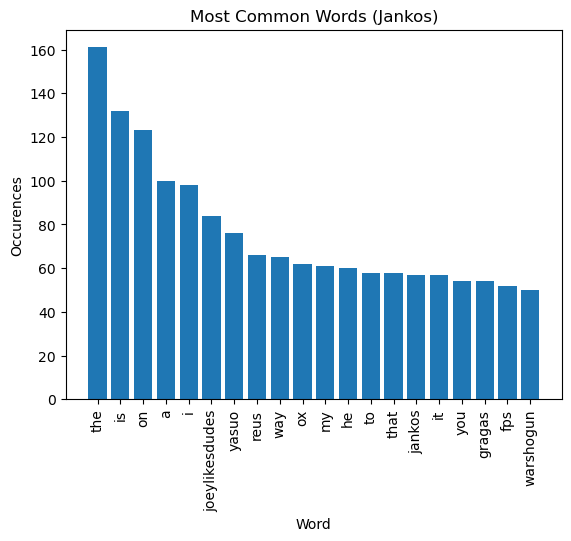

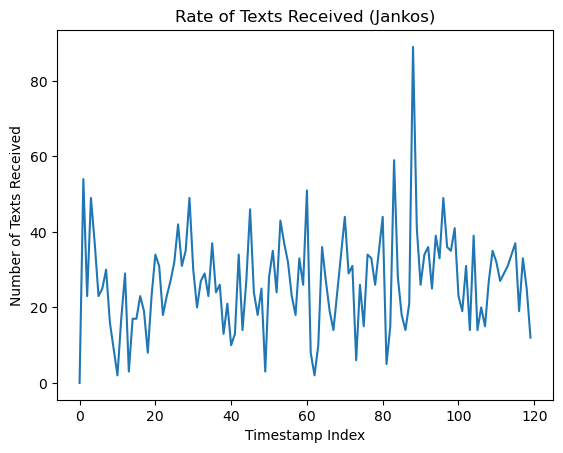

In [27]:
# ../outputs/jankos/none.json

most_common = plot_most_common_words("../output/jankos/none.json", 20, title="Most Common Words (Jankos)")
plot_rate_of_text("../output/jankos/none.json", title="Rate of Texts Received (Jankos)")


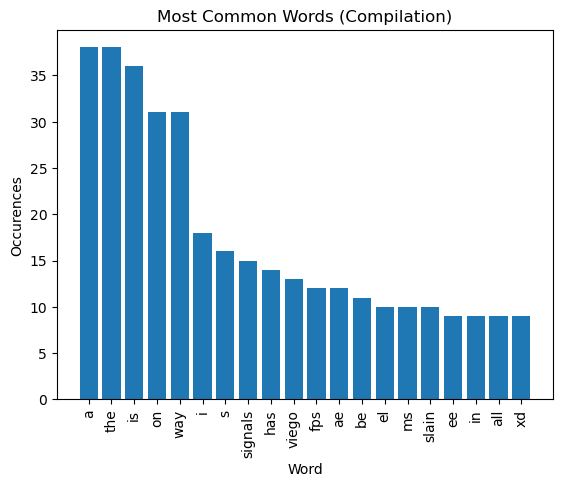

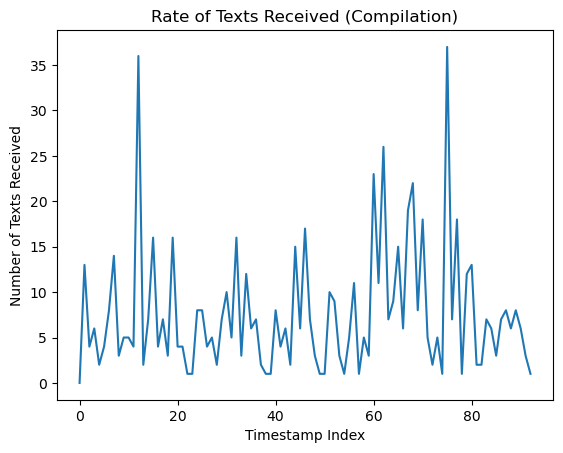

In [29]:
# ../output/compilation/chat.json

most_common = plot_most_common_words("../output/compilation/HUD.json", 20, title="Most Common Words (Compilation)")
plot_rate_of_text("../output/compilation/HUD.json", title="Rate of Texts Received (Compilation)")

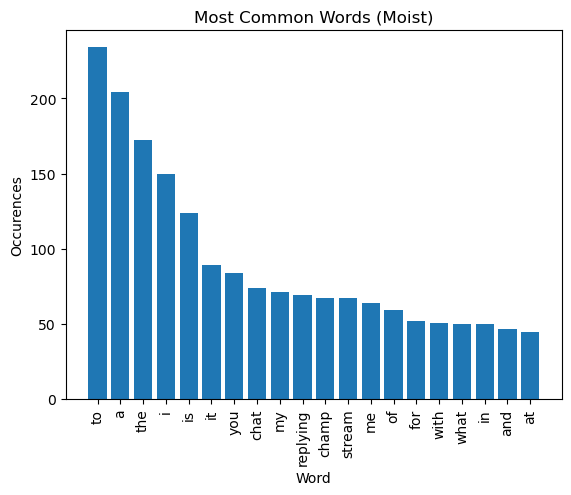

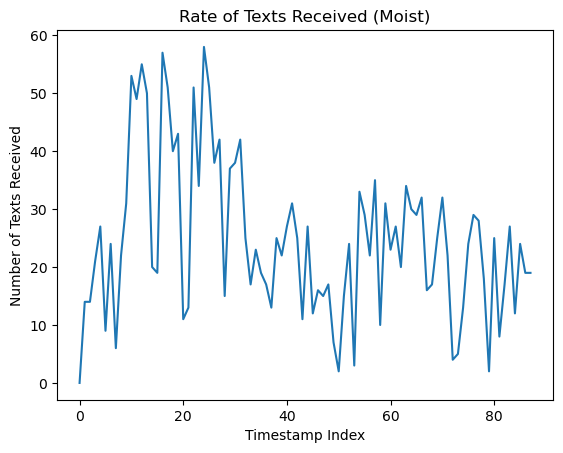

In [31]:
# ../output/moist/chat.json

most_common = plot_most_common_words("../output/moist/chat.json", 20, title="Most Common Words (Moist)")
plot_rate_of_text("../output/moist/chat.json", title="Rate of Texts Received (Moist)")